In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
data = pd.read_csv("BTC-USD_SIGNALS.csv")
data

,Date,Open,High,Low,Close,Volume,Variation,RSI,MACD,MACD_H,Confirmation Time,Transactions,Miners Revenue,FnG
0,2018-02-01,10237.299805,10288.799805,8812.280273,9170.540039,-0.292146,-2.712213,-1.043523,-1.108359,-0.475907,1.144750,-0.774692,-0.186892,-0.583209
1,2018-02-02,9142.280273,9142.280273,7796.490234,8830.750000,-0.152676,-1.011481,-1.204172,-1.202571,-0.654534,1.144750,-0.774692,-0.186892,-1.244407
2,2018-02-03,8852.120117,9430.750000,8251.629883,9174.910156,-0.427993,0.955604,-1.632900,-1.235294,-0.618233,1.114249,-0.774692,-0.186892,-0.142410
3,2018-02-04,9175.700195,9334.870117,8031.220215,8277.009766,-0.437581,-2.584947,-1.626830,-1.320379,-0.741794,1.114249,-1.144752,-0.264496,-0.847688
4,2018-02-05,8270.540039,8364.839844,6756.680176,6955.270020,-0.326118,-4.184569,-1.814295,-1.479953,-1.057732,1.114249,-1.144752,-0.264496,-1.420727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,2022-09-04,19832.470703,19999.689453,19636.816406,19986.712891,0.478227,0.148948,-1.113287,-0.844382,-0.254845,-1.063067,-0.648298,-0.307825,-1.024008
1680,2022-09-05,19988.789063,20031.160156,19673.046875,19812.371094,0.658018,-0.278482,-1.133325,-0.831832,-0.166540,-0.742360,-0.648298,-0.307825,-0.891768
1681,2022-09-06,19817.724609,20155.269531,18800.171875,18837.667969,1.393318,-1.325705,-1.548973,-0.892284,-0.308652,-0.742360,-0.165203,-0.359746,-0.935848
1682,2022-09-07,18837.683594,19427.171875,18644.466797,19290.324219,0.981876,0.568952,-1.180050,-0.893278,-0.249058,-0.742360,-0.165203,-0.359746,-0.847688


# Correlations

In [3]:
corr = data.corr("spearman")
corr

,Open,High,Low,Close,Volume,Variation,RSI,MACD,MACD_H,Confirmation Time,Transactions,Miners Revenue,FnG
Open,1.000000,0.998789,0.998368,0.997318,0.695698,-0.028736,0.088752,0.154858,-0.004918,-0.082210,-0.088747,0.887638,0.273665
High,0.998789,1.000000,0.997863,0.998676,0.702281,0.001898,0.096506,0.155834,-0.000358,-0.078512,-0.089046,0.889125,0.274098
Low,0.998368,0.997863,1.000000,0.998754,0.691858,0.003975,0.100563,0.158835,0.004588,-0.088293,-0.083622,0.883554,0.276658
Close,0.997318,0.998676,0.998754,1.000000,0.697723,0.031704,0.105808,0.159204,0.006816,-0.082135,-0.085757,0.885856,0.275767
Volume,0.695698,0.702281,0.691858,0.697723,1.000000,0.038129,0.190448,0.243312,0.006024,0.140704,0.258613,0.579938,0.300334
Variation,-0.028736,0.001898,0.003975,0.031704,0.038129,1.000000,0.249757,0.081463,0.142537,0.046942,0.052755,-0.030147,0.046482
RSI,0.088752,0.096506,0.100563,0.105808,0.190448,0.249757,1.000000,0.673356,0.656900,0.157509,0.262073,0.054013,0.604237
MACD,0.154858,0.155834,0.158835,0.159204,0.243312,0.081463,0.673356,1.000000,0.209437,0.202946,0.378117,0.127921,0.811152
MACD_H,-0.004918,-0.000358,0.004588,0.006816,0.006024,0.142537,0.656900,0.209437,1.000000,0.041363,0.013287,-0.001313,0.183401
Confirmation Time,-0.082210,-0.078512,-0.088293,-0.082135,0.140704,0.046942,0.157509,0.202946,0.041363,1.000000,0.100474,-0.217726,0.325821


In [4]:
corr[["Variation"]].sort_values(by="Variation")

,Variation
Miners Revenue,-0.030147
Open,-0.028736
High,0.001898
Low,0.003975
Close,0.031704
Volume,0.038129
FnG,0.046482
Confirmation Time,0.046942
Transactions,0.052755
MACD,0.081463


array([[<AxesSubplot:xlabel='Open', ylabel='Open'>,
        <AxesSubplot:xlabel='High', ylabel='Open'>,
        <AxesSubplot:xlabel='Low', ylabel='Open'>,
        <AxesSubplot:xlabel='Close', ylabel='Open'>,
        <AxesSubplot:xlabel='Volume', ylabel='Open'>,
        <AxesSubplot:xlabel='Variation', ylabel='Open'>,
        <AxesSubplot:xlabel='RSI', ylabel='Open'>,
        <AxesSubplot:xlabel='MACD', ylabel='Open'>,
        <AxesSubplot:xlabel='MACD_H', ylabel='Open'>,
        <AxesSubplot:xlabel='Confirmation Time', ylabel='Open'>,
        <AxesSubplot:xlabel='Transactions', ylabel='Open'>,
        <AxesSubplot:xlabel='Miners Revenue', ylabel='Open'>,
        <AxesSubplot:xlabel='FnG', ylabel='Open'>],
       [<AxesSubplot:xlabel='Open', ylabel='High'>,
        <AxesSubplot:xlabel='High', ylabel='High'>,
        <AxesSubplot:xlabel='Low', ylabel='High'>,
        <AxesSubplot:xlabel='Close', ylabel='High'>,
        <AxesSubplot:xlabel='Volume', ylabel='High'>,
        <AxesSubplot:xl

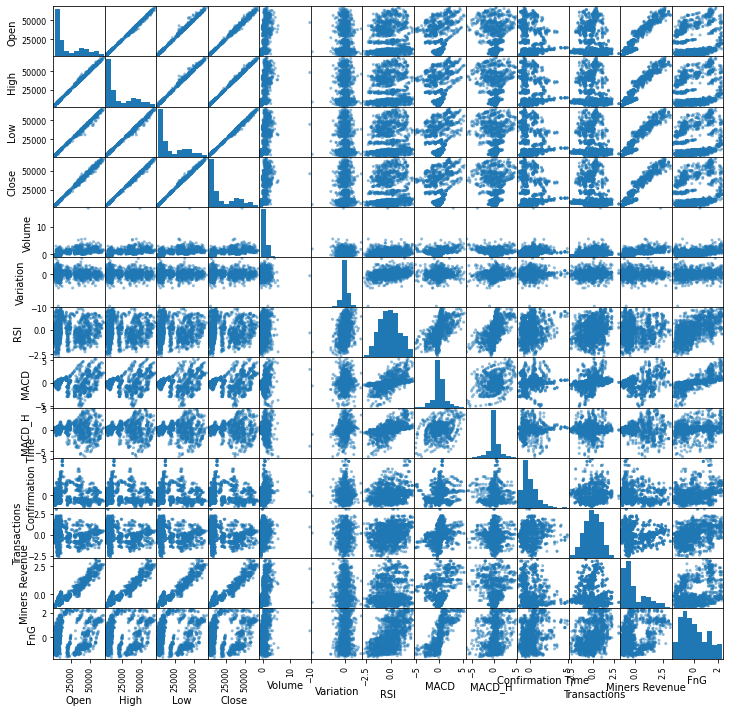

In [5]:
pd.plotting.scatter_matrix(data,figsize=[12,12])

## Adding Variation+1

In [6]:
newdata = data.copy()
newdata["Variation+1"] = data["Variation"].shift(-1)
newdata

,Date,Open,High,Low,Close,Volume,Variation,RSI,MACD,MACD_H,Confirmation Time,Transactions,Miners Revenue,FnG,Variation+1
0,2018-02-01,10237.299805,10288.799805,8812.280273,9170.540039,-0.292146,-2.712213,-1.043523,-1.108359,-0.475907,1.144750,-0.774692,-0.186892,-0.583209,-1.011481
1,2018-02-02,9142.280273,9142.280273,7796.490234,8830.750000,-0.152676,-1.011481,-1.204172,-1.202571,-0.654534,1.144750,-0.774692,-0.186892,-1.244407,0.955604
2,2018-02-03,8852.120117,9430.750000,8251.629883,9174.910156,-0.427993,0.955604,-1.632900,-1.235294,-0.618233,1.114249,-0.774692,-0.186892,-0.142410,-2.584947
3,2018-02-04,9175.700195,9334.870117,8031.220215,8277.009766,-0.437581,-2.584947,-1.626830,-1.320379,-0.741794,1.114249,-1.144752,-0.264496,-0.847688,-4.184569
4,2018-02-05,8270.540039,8364.839844,6756.680176,6955.270020,-0.326118,-4.184569,-1.814295,-1.479953,-1.057732,1.114249,-1.144752,-0.264496,-1.420727,2.918547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,2022-09-04,19832.470703,19999.689453,19636.816406,19986.712891,0.478227,0.148948,-1.113287,-0.844382,-0.254845,-1.063067,-0.648298,-0.307825,-1.024008,-0.278482
1680,2022-09-05,19988.789063,20031.160156,19673.046875,19812.371094,0.658018,-0.278482,-1.133325,-0.831832,-0.166540,-0.742360,-0.648298,-0.307825,-0.891768,-1.325705
1681,2022-09-06,19817.724609,20155.269531,18800.171875,18837.667969,1.393318,-1.325705,-1.548973,-0.892284,-0.308652,-0.742360,-0.165203,-0.359746,-0.935848,0.568952
1682,2022-09-07,18837.683594,19427.171875,18644.466797,19290.324219,0.981876,0.568952,-1.180050,-0.893278,-0.249058,-0.742360,-0.165203,-0.359746,-0.847688,0.000209


In [7]:
corr = newdata.corr("spearman")
corr

,Open,High,Low,Close,Volume,Variation,RSI,MACD,MACD_H,Confirmation Time,Transactions,Miners Revenue,FnG,Variation+1
Open,1.000000,0.998789,0.998368,0.997318,0.695698,-0.028736,0.088752,0.154858,-0.004918,-0.082210,-0.088747,0.887638,0.273665,-0.023793
High,0.998789,1.000000,0.997863,0.998676,0.702281,0.001898,0.096506,0.155834,-0.000358,-0.078512,-0.089046,0.889125,0.274098,-0.024598
Low,0.998368,0.997863,1.000000,0.998754,0.691858,0.003975,0.100563,0.158835,0.004588,-0.088293,-0.083622,0.883554,0.276658,-0.026967
Close,0.997318,0.998676,0.998754,1.000000,0.697723,0.031704,0.105808,0.159204,0.006816,-0.082135,-0.085757,0.885856,0.275767,-0.028394
Volume,0.695698,0.702281,0.691858,0.697723,1.000000,0.038129,0.190448,0.243312,0.006024,0.140704,0.258613,0.579938,0.300334,0.022955
Variation,-0.028736,0.001898,0.003975,0.031704,0.038129,1.000000,0.249757,0.081463,0.142537,0.046942,0.052755,-0.030147,0.046482,-0.045078
RSI,0.088752,0.096506,0.100563,0.105808,0.190448,0.249757,1.000000,0.673356,0.656900,0.157509,0.262073,0.054013,0.604237,0.037720
MACD,0.154858,0.155834,0.158835,0.159204,0.243312,0.081463,0.673356,1.000000,0.209437,0.202946,0.378117,0.127921,0.811152,0.035004
MACD_H,-0.004918,-0.000358,0.004588,0.006816,0.006024,0.142537,0.656900,0.209437,1.000000,0.041363,0.013287,-0.001313,0.183401,0.007900
Confirmation Time,-0.082210,-0.078512,-0.088293,-0.082135,0.140704,0.046942,0.157509,0.202946,0.041363,1.000000,0.100474,-0.217726,0.325821,0.052599


In [8]:
corr[["Variation+1"]].sort_values(by="Variation+1")

,Variation+1
Variation,-0.045078
Miners Revenue,-0.035875
Close,-0.028394
Low,-0.026967
High,-0.024598
Open,-0.023793
MACD_H,0.007900
Volume,0.022955
MACD,0.035004
RSI,0.037720


In [9]:
#plt.show()

## Variation with respect to other variables

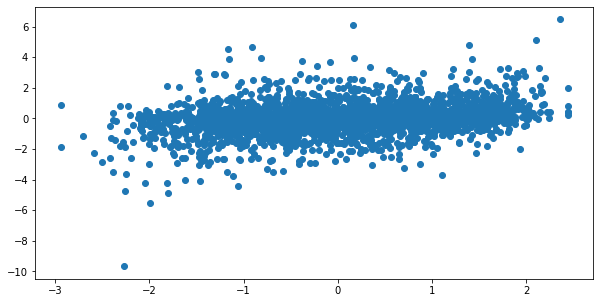

In [40]:
plt.figure(figsize=[10,5])
plt.scatter(data["RSI"],data["Variation"])

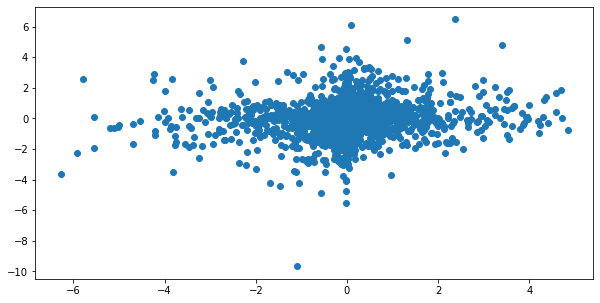

In [41]:
plt.figure(figsize=[10,5])
plt.scatter(data["MACD_H"],data["Variation"])

No handles with labels found to put in legend.


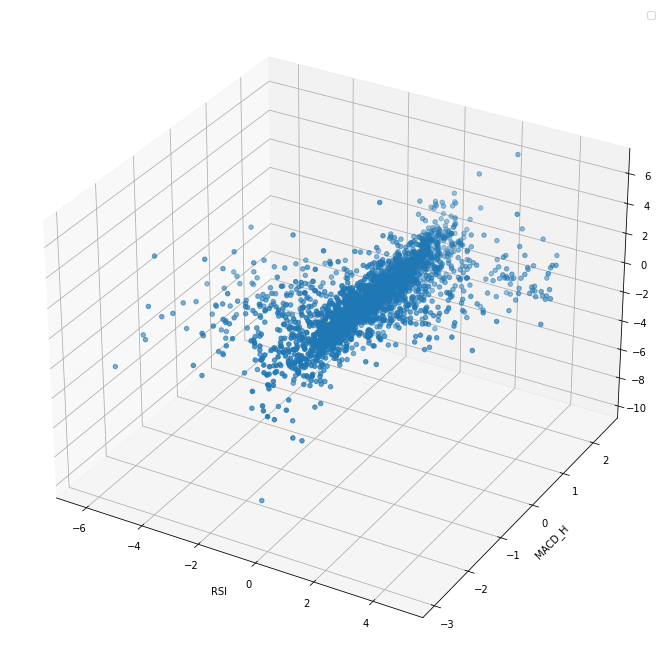

In [42]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(list(data["MACD_H"]),list(data["RSI"]),list(data["Variation"]))
plt.xlabel(xlabel="RSI")
plt.ylabel(ylabel="MACD_H")
plt.legend()
plt.show()